In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [4]:
df = pd.read_csv('food-price-index-Aug20-index-numbers-csv-tables.csv')
df.head(5)

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
0,CPIM.SE901,1960.01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
1,CPIM.SE901,1960.02,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
2,CPIM.SE901,1960.03,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
3,CPIM.SE901,1960.04,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
4,CPIM.SE901,1960.05,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food


In [45]:
df.tail(5) 

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
11494,CPIM.SE901502,2020.04,NaN,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food
11495,CPIM.SE901502,2020.05,1102.0,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food
11496,CPIM.SE901502,2020.06,1110.0,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food
11497,CPIM.SE901502,2020.07,1111.0,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food
11498,CPIM.SE901502,2020.08,1111.0,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food


In [3]:
df.dtypes

Series_reference     object
Period              float64
Data_value          float64
STATUS               object
UNITS                object
Subject              object
Group                object
Series_title_1       object
dtype: object

In [47]:
df = df.drop(['Series_title_1'], axis=1)
df.head(5)

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group
0,CPIM.SE901,1960.01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
1,CPIM.SE901,1960.02,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
2,CPIM.SE901,1960.03,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
3,CPIM.SE901,1960.04,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
4,CPIM.SE901,1960.05,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand


In [48]:
df = df.rename(columns={"Subject" : "Judul"})
df.head(5)

,Series_reference,Period,Data_value,STATUS,UNITS,Judul,Group
0,CPIM.SE901,1960.01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
1,CPIM.SE901,1960.02,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
2,CPIM.SE901,1960.03,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
3,CPIM.SE901,1960.04,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
4,CPIM.SE901,1960.05,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand


In [49]:
df.shape

(11499, 7)

In [50]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [51]:
df.count()

Series_reference    11499
Period              11499
Data_value          11496
STATUS              11499
UNITS               11499
Judul               11499
Group               11499
dtype: int64

In [52]:
df = df.drop_duplicates()
df.head(5)

,Series_reference,Period,Data_value,STATUS,UNITS,Judul,Group
0,CPIM.SE901,1960.01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
1,CPIM.SE901,1960.02,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
2,CPIM.SE901,1960.03,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
3,CPIM.SE901,1960.04,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand
4,CPIM.SE901,1960.05,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand


In [53]:
df.count()

Series_reference    11499
Period              11499
Data_value          11496
STATUS              11499
UNITS               11499
Judul               11499
Group               11499
dtype: int64

In [54]:
print(df.isnull().sum())

Series_reference    0
Period              0
Data_value          3
STATUS              0
UNITS               0
Judul               0
Group               0
dtype: int64


In [55]:
df = df.dropna()    # Dropping the missing values.
df.count()

Series_reference    11496
Period              11496
Data_value          11496
STATUS              11496
UNITS               11496
Judul               11496
Group               11496
dtype: int64

In [56]:
print(df.isnull().sum())

Series_reference    0
Period              0
Data_value          0
STATUS              0
UNITS               0
Judul               0
Group               0
dtype: int64


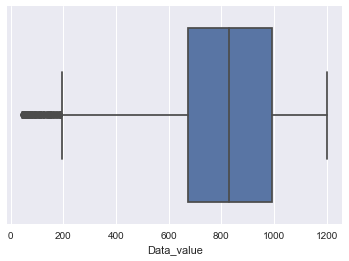

In [8]:
sns.set(color_codes=True)

sns.boxplot(x=df['Data_value'])

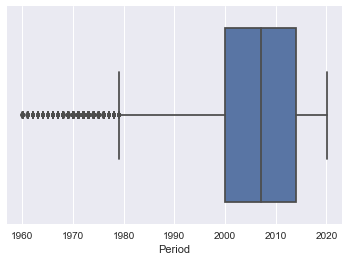

In [57]:
sns.boxplot(x=df['Period'])

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Period         13.970000
Data_value    318.626577
dtype: float64


In [69]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df.shape

(11496, 7)

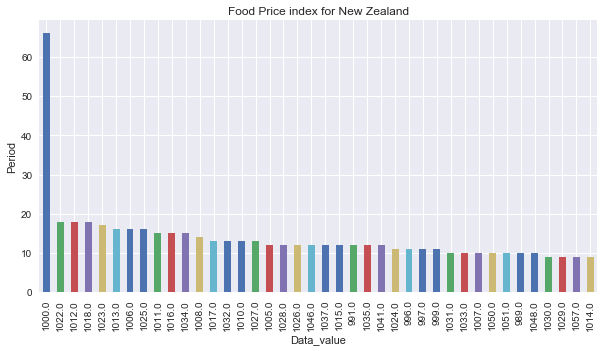

In [17]:
df.Data_value.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Food Price index for New Zealand")
plt.ylabel('Period')
plt.xlabel('Data_value');

,Period,Data_value
Period,1.000000,0.921887
Data_value,0.921887,1.000000


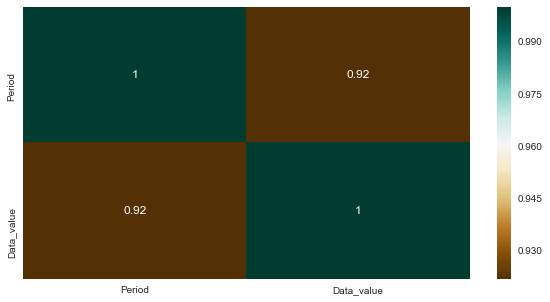

In [11]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

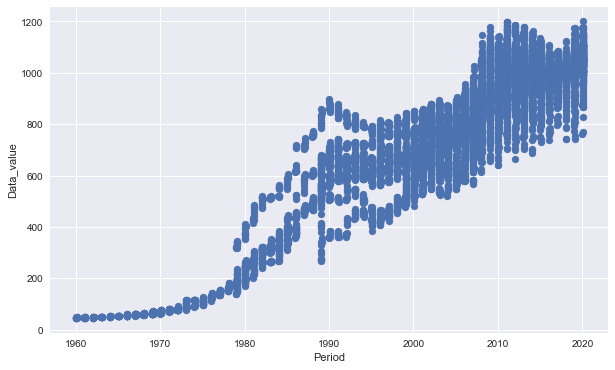

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Period'], df['Data_value'])
ax.set_xlabel('Period')
ax.set_ylabel('Data_value')
plt.show()

Setelah melakukan praktikum, dapat dianalisis bahwa :
- DataSet yang digunakan pada Praktikum ini adalah food-price-index-August 20th index numbers.
- DataSet yang digunakan harus berformat txt atau csv dan disimpan dalam suatu folder.
- Sebelum memasukkan SourceCode, inputkan libraries. Dimana libraries digunakan untuk membantu dalam mengolah atau mengerjakan 
  task.
- Pada Praktikum kali ini terdapat perintah yang digunakan untuk memuat data ke dalam jupyter notebook. Dimana perintah tersebut 
  hanya memanggil 5 baris dan output tersebut akan menampilkan isi dari Dataset.
- Mengecheck tipe-tipe data.
- Menghapus kolom yang tidak diinginkan, maka output tersebut tidak akan menampilkan kolom yang dihapus.
- Merename kolom, Misal pada suatu kolom bernama subject diubah menjadi judul, maka output pada kolom subject berubah menjadi 
  judul.
- Menghapus semua nilai duplikat dari kumpulan data.
- Menghapus sebagian besar niali mirip tetapi di sini semua nilai yang hilang terdeteksi dan dihapus nanti.
- Mendeteksi Pencilan adalah titik atau sekumpulan titik yang berbeda dari titik lainnya.
- Histogram adalah tampilan grafis batangan sebagai manifestasi data binning.
- Heatmap merupakan teknik untuk mengetahui perilaku pengunjung suatu situs dengan menyediakan data berupa statistik.
- Scatterrplot adalah gambaran yang menunjukkan kemungkinan hubungan( korelasi ) antara pasangan dua macam variabel tersebut 
  yang sering diwujudkan sebagai koefisien korelasi.
